Sequence Composition

+ GC, AT Content
+ Automatically Calculates the gc_content

In [4]:
#!pip install scikit-bio

In [5]:
from skbio import DNA,RNA,Protein,Sequence

In [6]:
dna_seq = DNA("ATGATCTCGTAA")

In [7]:
# Get GC Content: Returns a percentage of GC as compared to the whole
dna_seq.gc_content()

0.3333333333333333

In [8]:
# Custom GC Content
def gc_content(seq):
  return float(seq.count("G") + seq.count("C"))/len(seq) * 100

In [9]:
gc_content(dna_seq)

33.33333333333333

In [10]:
# Get GC Frequency: Counts the number of G and C in your Sequence
dna_seq.gc_frequency()

4

In [11]:
# Custom GC Freq
def gc_freq(seq):
  return seq.count("G") + seq.count("C")

In [12]:
gc_freq(dna_seq)

4

In [13]:
# AT Content
def at_content(seq):
  return float(seq.count("A") + seq.count("T"))/len(seq) * 100

In [14]:
at_content(dna_seq)

66.66666666666666

In [15]:
# AT Frequency
def at_freq(seq):
  return seq.count("A") + seq.count("T")

In [16]:
at_freq(dna_seq)

8

In [17]:
# Difference Between GC_content and GC_frequency


In [18]:
# Get Frequencies of each Nucleotide
dna_seq.frequencies()

{'A': 4, 'C': 2, 'G': 2, 'T': 4}

In [19]:
from collections import Counter

In [20]:
Counter(str(dna_seq))

Counter({'A': 4, 'T': 4, 'G': 2, 'C': 2})

<BarContainer object of 4 artists>

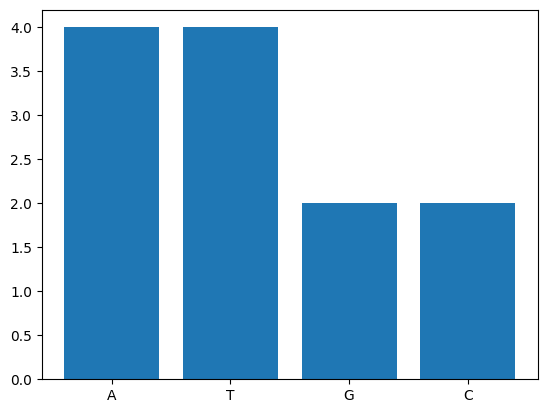

In [21]:
# Plot of Nucleotides
import matplotlib.pyplot as plt
plt.bar(Counter(str(dna_seq)).keys(), Counter(str(dna_seq)).values())

###Kmers
+ K-mers are subsequences of length contained within a biological sequence.
+ More generally, a sequence of length
 + L will have L-K+1 k-mers and n^K total possible k-mers
 + where n is number of possible monomers

#### Usefulness
+ assemble DNA sequence
+ improve heterologous gene expression
+ identify species in metagenomic samples
+ create attenuated vaccines



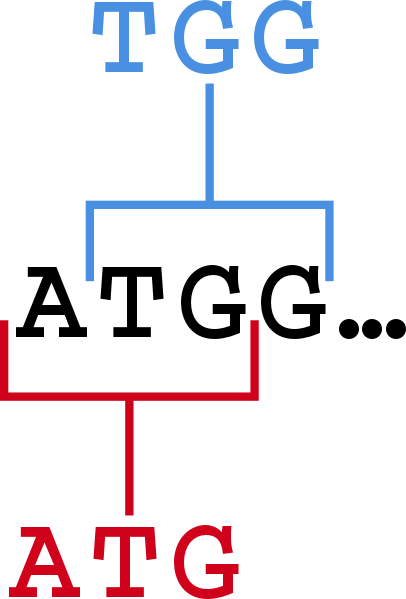

In [22]:
dna_seq

DNA
--------------------------
Stats:
    length: 12
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATGATCTCGT AA

In [23]:
print(dna_seq)

ATGATCTCGTAA


In [24]:
# Find Kmers
dna_seq.kmer_frequencies(3)

{'ATG': 1,
 'TGA': 1,
 'GAT': 1,
 'ATC': 1,
 'TCT': 1,
 'CTC': 1,
 'TCG': 1,
 'CGT': 1,
 'GTA': 1,
 'TAA': 1}

In [26]:
 # Find kmers
dna_seq.kmer_frequencies(4)

{'ATGA': 1,
 'TGAT': 1,
 'GATC': 1,
 'ATCT': 1,
 'TCTC': 1,
 'CTCG': 1,
 'TCGT': 1,
 'CGTA': 1,
 'GTAA': 1}

In [29]:
# Custom Kmer
# L - K+1
def count_kmers(seq,k=3):
  # Empty Dictionary
  counts = {}
  num_kmers = len(seq) - k + 1
  for i in range(num_kmers):
    # Slicing the seq to get kmer
    kmer = seq[i:i+k]
    if kmer not in counts:
      counts[kmer] = 0

    # increment
    counts[kmer] += 1
  return counts

In [30]:
count_kmers(str(dna_seq))

{'ATG': 1,
 'TGA': 1,
 'GAT': 1,
 'ATC': 1,
 'TCT': 1,
 'CTC': 1,
 'TCG': 1,
 'CGT': 1,
 'GTA': 1,
 'TAA': 1}

In [31]:
count_kmers(str(dna_seq), k=4)

{'ATGA': 1,
 'TGAT': 1,
 'GATC': 1,
 'ATCT': 1,
 'TCTC': 1,
 'CTCG': 1,
 'TCGT': 1,
 'CGTA': 1,
 'GTAA': 1}

In [33]:
# iterating through a kmer
for k in dna_seq.iter_kmers(3,overlap=True):
  print(k)

ATG
TGA
GAT
ATC
TCT
CTC
TCG
CGT
GTA
TAA


In [34]:
# Kmer Freq
dna_kfreq = dna_seq.kmer_frequencies(3)

<BarContainer object of 10 artists>

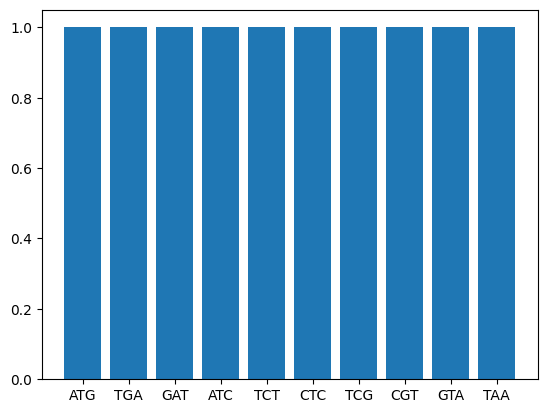

In [35]:
# Kmers Plot
plt.bar(dna_kfreq.keys(), dna_kfreq.values())

In [36]:
dna_seq1 = DNA("ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA")

In [37]:
dna1_kfreq = dna_seq1.kmer_frequencies(3)

<BarContainer object of 37 artists>

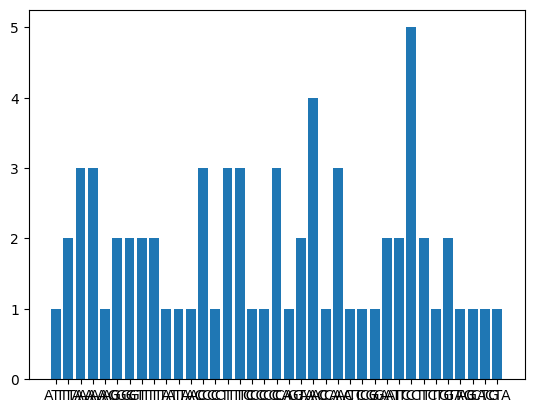

In [44]:
# Plot of Kmers Freq
plt.bar(dna1_kfreq.keys(), dna1_kfreq.values())
